# Team 11 

## Water Potability

In [1]:
## importing the Modules 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [1]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable = 1 and Not potable = 0

In [2]:
df = pd.read_csv("water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [86]:
print(df.info())
print("*"*30)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
******************************
(3276, 10)


In [96]:
df.isna().sum().to_frame(name = "NaN")

,NaN
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## DATA Preparation

In [94]:

df.skew(axis=0).to_frame(name='Skewed Values')

,Skewed Values
ph,0.027796
Hardness,-0.039342
Solids,0.621634
Chloramines,-0.012098
Sulfate,-0.027278
Conductivity,0.264490
Organic_carbon,0.025533
Trihalomethanes,-0.085161
Turbidity,-0.007817
Potability,0.450784


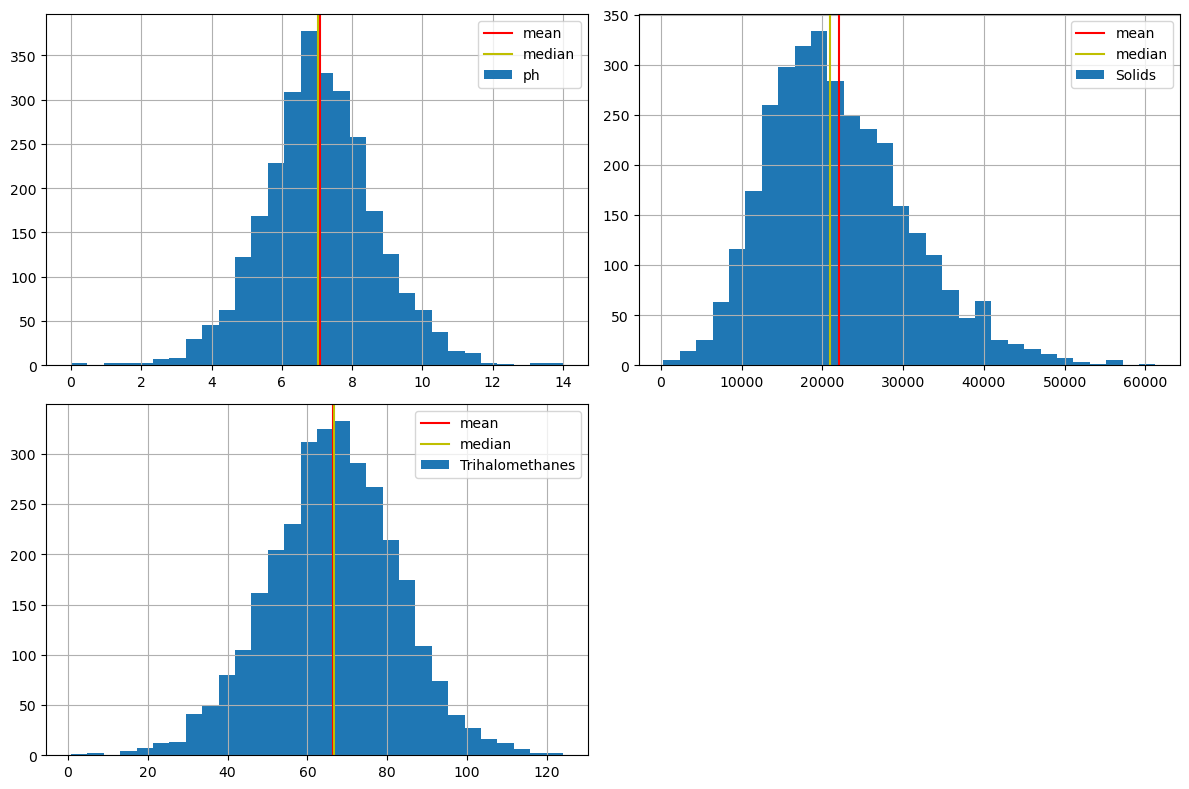

In [59]:
plt.figure(figsize=(12, 8))
plt.style.use('default')
plt.subplot(221 )
plot1 = df["ph"].hist(bins=30, label = "ph")
plt.axvline(df["ph"].mean(), color ='r', label = "mean")
plt.axvline(df["ph"].median(), color ='y', label = "median")
plt.legend()
plt.subplot(222)
plot2 = df["Solids"].hist(bins=30 , label = "Solids" )
plt.axvline(df["Solids"].mean(), color ='r', label = "mean")
plt.axvline(df["Solids"].median(), color ='y', label = "median")
plt.legend()
plt.subplot(223 )
plot3 =  df["Trihalomethanes"].hist(bins=30 ,  label = "Trihalomethanes" )
plt.axvline(df["Trihalomethanes"].mean(), color ='r', label = "mean")
plt.axvline(df["Trihalomethanes"].median(), color ='y', label = "median")

plt.tight_layout()
plt.legend()
plt.show()

In [60]:
#ph values are evenly distributed so we can use mean
df['ph'].fillna(df['ph'].mean(),inplace=True)
#sulphate values are slightly on the right side and it has outliers which may affect mean hence we will use median here
df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
#Trihalomethanes values are evenly distributed so we will use mean
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

In [91]:
df.isna().sum().to_frame(name = "NaN")

,NaN
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [78]:
df2 = df[df.columns[:-1]]
df2.head()
# df2 = df[["ph","Solids"]]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [117]:
df.describe().T
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.608364,36.143851,129.000000,317.094638,333.073546,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [102]:
df.groupby("Potability").median()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.080795,197.123423,20809.618280,7.090334,333.073546,422.229331,14.293508,66.396293,3.948076
1,7.080795,196.632907,21199.386614,7.215163,333.073546,420.712729,14.162809,66.396293,3.958576


In [103]:
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.533513,3.968328


In [106]:
df.groupby("Potability").agg({"ph": "mean"})

,ph
Potability,
0,7.084658
1,7.074754


In [107]:
df.groupby("Potability").agg(["mean", "median"])

ph              Hardness                    Solids  \
                mean    median        mean      median          mean   
Potability                                                             
0           7.084658  7.080795  196.733292  197.123423  21777.490788   
1           7.074754  7.080795  195.800744  196.632907  22383.991018   

                         Chloramines               Sulfate              \
                  median        mean    median        mean      median   
Potability                                                               
0           20809.618280    7.092175  7.090334  334.200184  333.073546   
1           21199.386614    7.169338  7.215163  332.683125  333.073546   

           Conductivity             Organic_carbon            Trihalomethanes  \
                   mean      median           mean     median            mean   
Potability                                                                      
0            426.730454  422.229331      14.364335  14.293508       66.308522   
1            425.383800  420.712729      14.160893  14.162809       66.533513   

                      Turbidity            
               median      mean    median  
Potability                                 
0           66.396293  3.965800  3.948076  
1           66.396293  3.968328  3.958576

In [113]:
Potability_Y = df.loc[df["Potability"] ==1]
Potability_N = df.loc[df["Potability"] ==0]

In [114]:
print(Potability_Y.shape, Potability_N.shape)

(1278, 10) (1998, 10)


## Outliers

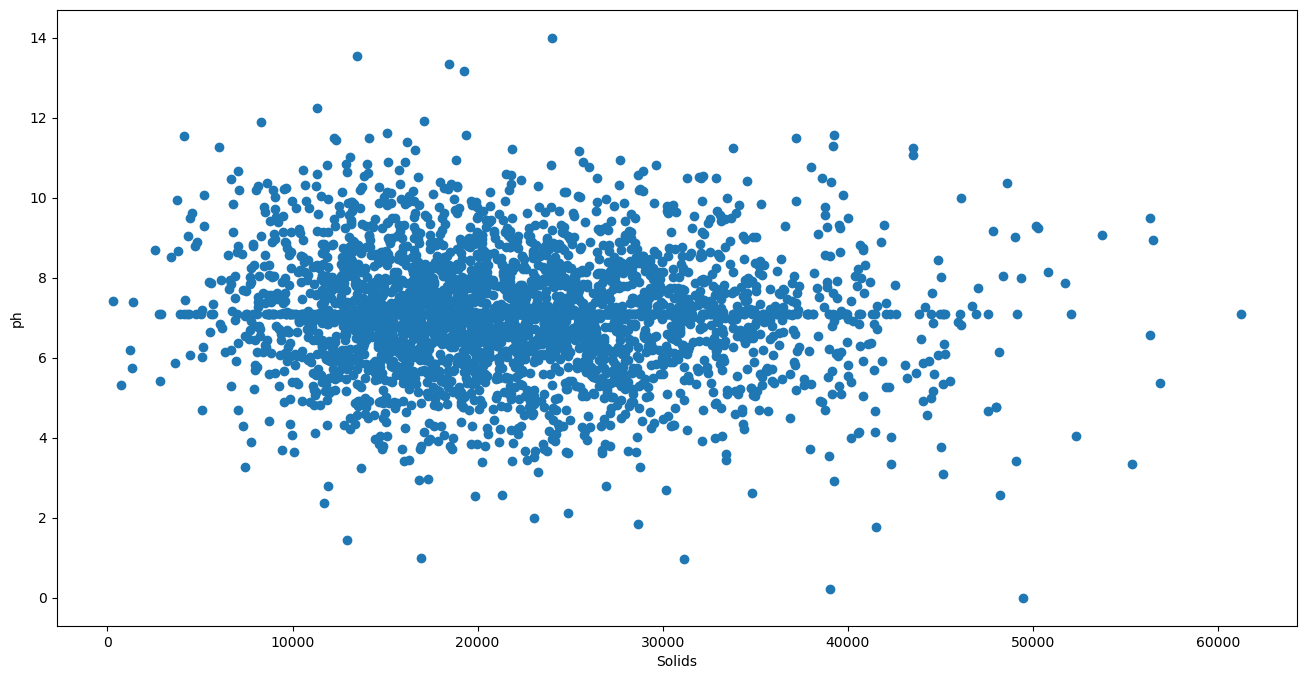

In [137]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Solids'], df['ph'])
ax.set_xlabel('Solids')
ax.set_ylabel('ph')
plt.show()

In [128]:
z = np.abs(stats.zscore(boston_df))
print(z)

[[1.02733269e-14 2.59194711e-01 1.39470871e-01 ... 1.30614943e+00
  1.28629758e+00 7.99774743e-01]
 [2.28933938e+00 2.03641367e+00 3.85986650e-01 ... 6.38479983e-01
  6.84217891e-01 7.99774743e-01]
 [6.92867789e-01 8.47664833e-01 2.40047337e-01 ... 1.50940884e-03
  1.16736546e+00 7.99774743e-01]
 ...
 [1.59125368e+00 6.26829230e-01 1.27080989e+00 ... 2.18748247e-01
  8.56006782e-01 1.25035206e+00]
 [1.32951593e+00 1.04135450e+00 1.14405809e+00 ... 7.03468419e-01
  9.50797383e-01 1.25035206e+00]
 [5.40150905e-01 3.85462310e-02 5.25811937e-01 ... 7.80223466e-01
  2.12445866e+00 1.25035206e+00]]


In [131]:
threshold = 3 
print(np.where(z > 3))

(array([  37,   61,   66,   80,   88,  104,  140,  245,  253,  263,  263,
        272,  272,  275,  275,  278,  283,  285,  287,  304,  317,  321,
        330,  335,  342,  345,  347,  351,  351,  354,  357,  365,  366,
        379,  382,  383,  385,  434,  492,  509,  531,  546,  666,  680,
        692,  703,  726,  757,  781,  783,  785,  786,  810,  810,  951,
        990, 1031, 1068, 1073, 1075, 1077, 1106, 1123, 1156, 1157, 1186,
       1186, 1290, 1292, 1303, 1316, 1343, 1353, 1360, 1366, 1384, 1412,
       1490, 1523, 1537, 1542, 1554, 1554, 1563, 1605, 1630, 1642, 1743,
       1746, 1766, 1773, 1784, 1792, 1798, 1860, 1892, 1955, 2057, 2075,
       2096, 2121, 2134, 2156, 2189, 2204, 2236, 2302, 2318, 2336, 2343,
       2350, 2353, 2370, 2376, 2401, 2424, 2446, 2447, 2470, 2497, 2602,
       2646, 2646, 2681, 2694, 2699, 2704, 2726, 2757, 2853, 2861, 2868,
       2895, 2899, 2921, 2925, 2928, 2945, 2949, 3014, 3014, 3017, 3020,
       3035, 3042, 3088, 3094, 3130, 3142, 3150, 3